In [5]:
import pandas as pd
import requests
import re
from io import StringIO
import numpy as np

In [6]:
datetime_pattern = r'^\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}.\d{3}  '

def load_data(content: StringIO) -> pd.DataFrame:
    # Find first line with datetime
    first_line = ""
    for i, line in enumerate(content, start=0):
        if re.search(datetime_pattern, line):
            first_line = line
            break

    names = ['date', 'BX', 'BY', 'BZ', 'BT', 'XSC', 'YSC', 'ZSC', 'RSC']
    df1 = pd.read_csv(StringIO(first_line), header=None, delimiter='\s+', names=names, usecols=[0, 1, 2, 3])
    df = pd.read_csv(content, header=None, delimiter='\s+', names=names, usecols=[0, 1, 2, 3])
    df = pd.concat([df1, df])  # add first line to rest of the data
    print(df.iloc[0])
    print(df)
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%dT%H:%M:%S.%f')
    df.set_index('date', inplace=True)
    df.replace(99999.999, np.nan, inplace=True)
    return df# .resample('5min').mean()


def fetch_document(url: str) -> pd.DataFrame:
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception(f"Failed to download file. Status code: {response.status_code}")
    content = response.text
    document = load_data(StringIO(content))
    return document

In [7]:
url = "https://archives.esac.esa.int/psa/ftp/VENUS-EXPRESS/MAG/VEX-V-Y-MAG-4-V1.0/DATA/ORB200609_S004/MAG_20060910_DOY253_S004_V1.TAB"

df = fetch_document(url)
df.head()

date    2006-09-10T00:00:00.000
BX                        2.626
BY                        5.439
BZ                        1.449
Name: 0, dtype: object
                          date     BX      BY     BZ
0      2006-09-10T00:00:00.000  2.626   5.439  1.449
0      2006-09-10T00:00:04.000  2.693   5.283  1.498
1      2006-09-10T00:00:08.000  2.692   5.028  1.609
2      2006-09-10T00:00:12.000  2.579   4.684  1.681
3      2006-09-10T00:00:16.000  2.701   4.775  1.679
...                        ...    ...     ...    ...
21594  2006-09-10T23:59:40.000  0.364 -38.486 -9.162
21595  2006-09-10T23:59:44.000 -0.034 -37.815 -9.527
21596  2006-09-10T23:59:48.000 -0.394 -37.787 -9.457
21597  2006-09-10T23:59:52.000 -0.675 -37.876 -9.145
21598  2006-09-10T23:59:56.000 -0.769 -38.032 -9.103

[21600 rows x 4 columns]


,BX,BY,BZ
date,,,
2006-09-10 00:00:00,2.626,5.439,1.449
2006-09-10 00:00:04,2.693,5.283,1.498
2006-09-10 00:00:08,2.692,5.028,1.609
2006-09-10 00:00:12,2.579,4.684,1.681
2006-09-10 00:00:16,2.701,4.775,1.679


BX    0
BY    0
BZ    0
dtype: int64


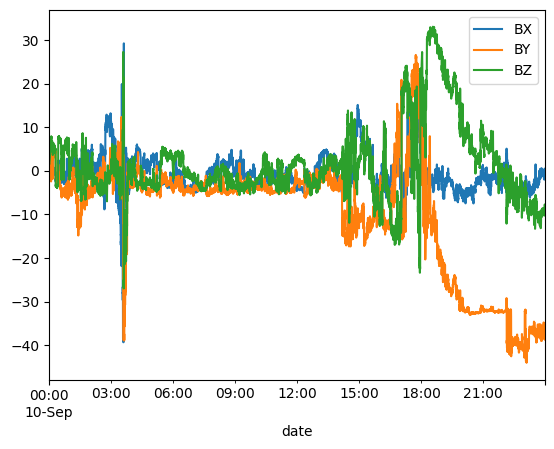

BX    0
BY    0
BZ    0
dtype: int64


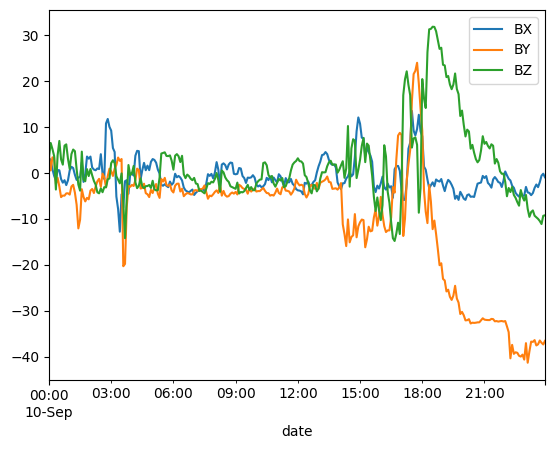

BX    0
BY    0
BZ    0
dtype: int64


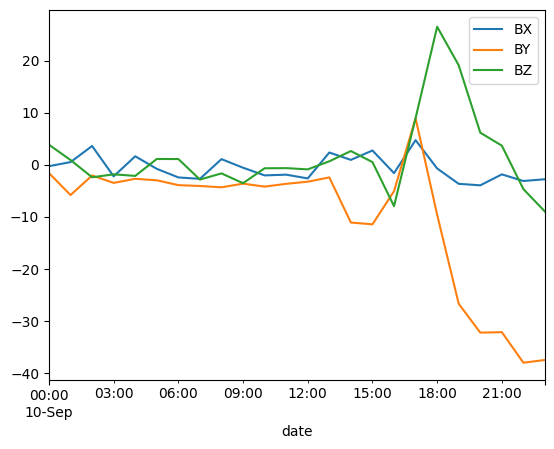

In [11]:
import matplotlib.pyplot as plt
df.plot()
df.dropna()
print(df.isna().sum())
plt.show()
df.resample('5min').mean().plot()
print(df.isna().sum())
plt.show()
df.resample('h').mean().plot()
print(df.isna().sum())


In [9]:
import pandas as pd
file_path = "DATA/VEX_MAGNETO/fetched_data2/VEX-V-Y-MAG-4-EXT1-V1.0.csv"
data = pd.read_csv(file_path, index_col=0, parse_dates=True, sep='\t')
data.head()

,BX,BY,BZ,BT,XSC,YSC,ZSC,RSC
date,,,,,,,,
2009-05-01 00:00:00,-0.323640,-7.881200,1.257040,8.032773,14833.042187,14616.281320,-26475.089453,33683.971573
2009-05-01 00:05:00,-0.952947,-7.038987,1.565813,7.448613,14747.973587,14565.214333,-25471.721667,32840.262600
2009-05-01 00:10:00,1.388693,-5.514587,3.655893,7.177880,14650.708360,14502.129293,-24447.320413,31978.961213
2009-05-01 00:15:00,1.734325,-4.945976,4.316161,6.862070,14540.318667,14426.085227,-23401.055840,31099.377160
2009-05-01 00:20:00,1.695480,-4.316547,5.257227,7.120360,14415.763667,14336.024640,-22332.036880,30200.770080


<Axes: xlabel='date'>

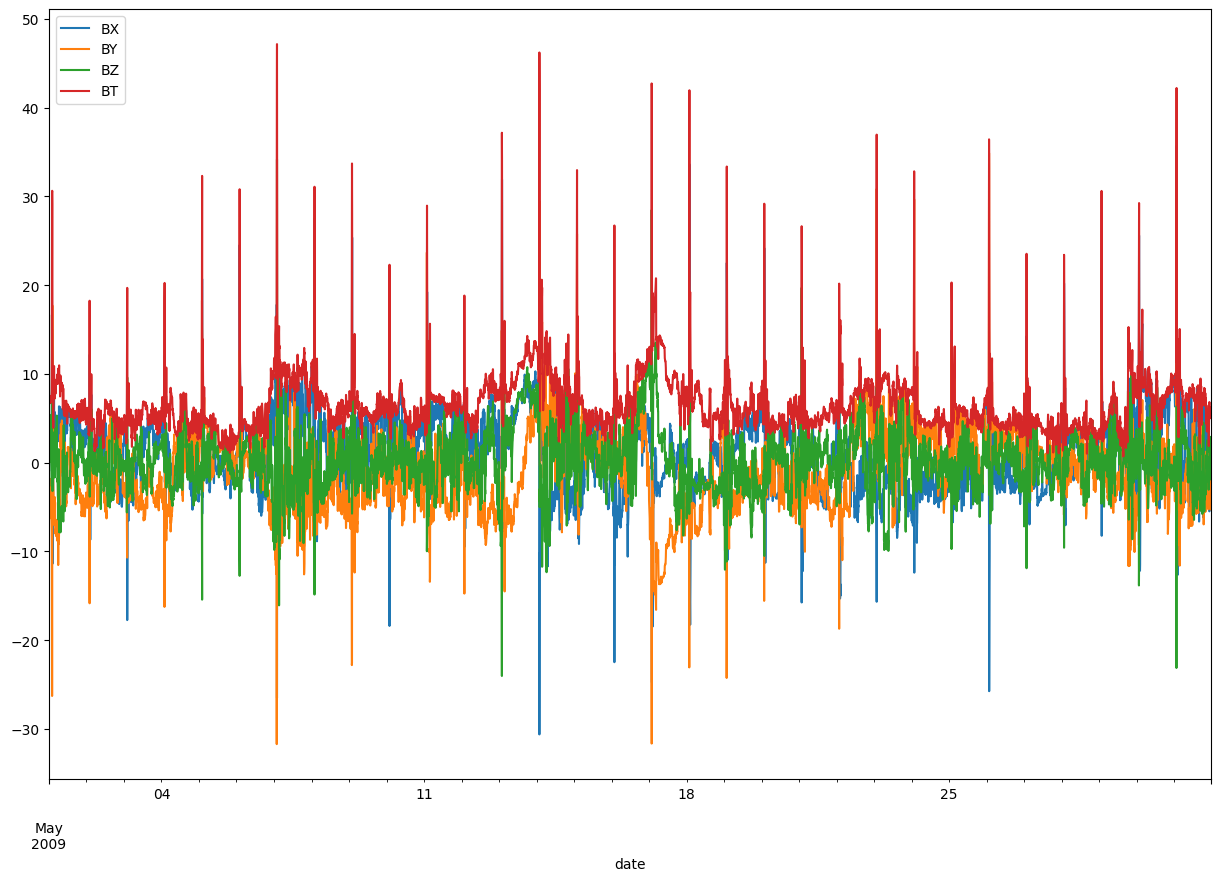

In [10]:
data[data.columns[:4]].plot(figsize=(15, 10))